In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA,TruncatedSVD, NMF
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from kmodes.kmodes import KModes

In [2]:
customers_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_customers_dataset.csv.zip')
order_items_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_order_items_dataset.csv.zip')
products_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_products_dataset.csv.zip')
translation_data = pd.read_csv('/Users/fabiobisognin/Desktop/product_category_name_translation.csv')
orders_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_orders_dataset.csv.zip')
trasaction_data= pd.read_csv('/Users/fabiobisognin/Desktop/olist_order_payments_dataset.csv.zip')

CAMBIO NOMBRE DE CATEGORÍAS A INGLÉS

In [3]:
category_translations = dict(zip(translation_data['product_category_name'],translation_data['product_category_name_english']))
products_data = products_data.replace({'product_category_name':category_translations})


JUNTO LA DATA INCLUYENDO SOLO LO QUE NECESITO

In [4]:
category= products_data[['product_id', 'product_category_name']]

In [5]:
order_items_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:

segment_data = pd.merge(customers_data, orders_data, on='customer_id', how='outer')
segment_data = pd.merge(segment_data, trasaction_data, on='order_id', how='outer')
segment_data = pd.merge(segment_data, order_items_data, on='order_id', how='outer')
data = pd.merge(segment_data, category, on='product_id', how='outer')




In [7]:
dat=data
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,credit_card,1.0,275.79,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,credit_card,1.0,275.79,2.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,credit_card,7.0,140.61,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,credit_card,10.0,137.58,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-27 23:23:38,2017-03-28 14:18:59,...,credit_card,1.0,30.95,1.0,aea06073397f809424f946979354c9f0,f45122a9ab94eb4f3f8953578bc0c560,2017-04-02 23:23:38,19.99,10.96,pet_shop
118430,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do guama,PA,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:46,2017-12-09 23:50:32,2017-12-11 20:29:02,...,credit_card,4.0,304.11,1.0,bbf975bffd2ae9ee52f513ae5c8a4b27,04aba03279157f6d4e0fe8ccaf21963c,2017-12-13 23:50:32,250.00,54.11,health_beauty
118431,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,sao paulo,SP,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:52,2018-04-04 18:08:41,2018-04-05 16:36:49,...,credit_card,3.0,92.36,1.0,f6e0a9ce8a6e91c3a0ca2d3005911d20,cab85505710c7cb9b720bceb52b01cee,2018-04-10 18:08:41,84.90,7.46,fashion_bags_accessories
118432,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,...,credit_card,5.0,167.79,1.0,c98bf47f7bea8f3aee82fa023786b8a1,51a04a8a6bdcb23deccc82b0b80742cf,2017-11-24 12:15:25,167.99,31.93,electronics


In [8]:
categ={'agro_industry_and_commerce':'outdoor',
       'air_conditioning':'car',
       'art':'home',
       'arts_and_craftmanship':'home',
       'audio':'car',
       'cat_auto':'car',
       'baby':'baby',
       'bed_bath_table':'home',
       'books_general_interest':'books',
       'books_imported':'books',
       'books_technical':'books',
       'cds_dvds_musicals':'electr',
       'christmas_supplies':'home',
       'cine_photo':'other',
       'computers':'computer',
       'computers_accessories':'computer',
       'consoles_games':'game',
       'construction_tools_construction':'outdoor',
       'construction_tools_lights':'outdoor',
       'construction_tools_safety':'outdoor',
       'cool_stuff':'cool',
       'costruction_tools_garden':'outdoor',
       'costruction_tools_tools':'outdoor',
       'diapers_and_hygiene':'health',
       'drinks':'food',
       'dvds_blu_ray':'electr',
       'electronics':'electr',
       'fashio_female_clothing':'apparel',
       'fashion_bags_accessories':'apparel',
       'fashion_childrens_clothes':'apparel',
       'fashion_male_clothing':'apparel',
       'fashion_shoes':'apparel',
       'fashion_sport':'sport',
       'fashion_underwear_beach':'apparel',
       'fixed_telephony':'home',
       'flowers':'home',
       'food':'food',
       'food_drink':'food',
       'furniture_bedroom':'home',
       'furniture_decor':'home',
       'furniture_living_room':'home',
       'furniture_mattress_and_upholstery':'home',
       'garden_tools':'home',
       'health_beauty':'health',
       'home_appliances':'home',
       'home_appliances_2':'home',
       'home_comfort_2':'home',
       'home_confort':'home',
       'home_construction':'home',
       'housewares':'home',
       'industry_commerce_and_business':'office',
       'kitchen_dining_laundry_garden_furniture':'home',
       'la_cuisine':'home',
       'luggage_accessories':'outdoor',
       'market_place':'other',
       'music':'other',
       'musical_instruments':'other',
       'office_furniture':'office',
       'party_supplies':'other',
       'pc_gamer':'computer',
       'perfumery':'health',
       'pet_shop':'other',
       'portateis_cozinha_e_preparadores_de_alimentos':'food',
       'security_and_services':'home',
       'signaling_and_security':'home',
       'small_appliances':'other',
       'small_appliances_home_oven_and_coffee':'home',
       'sports_leisure':'sport',
       'stationery':'office',
       'tablets_printing_image':'other',
       'telephony':'telephony',
       'toys':'baby',
       'watches_gifts':'gift'}

In [9]:
brazil_area={'PA':'norte',
'PB': 'noreste',
'PR':'sur',
'PE':'noreste',
'PI':'noreste',
'RJ':'sureste',
'RN':'noreste',
'RS':'sur',
'RO':'norte',
'RR':'norte',
'SC':'sur',
'SP':'sureste',
'SE':'noreste',
'TO':'norte',
'BA': 'noreste',
'CE': 'noreste',
'DF': 'centro',
'ES':'sureste',
'GO':'centro',
'MA':'noreste',
'MT':'centro',
'MS':'centro',
'MG':'sureste',
'AC':'norte',
'AL':'noreste',
'AP':'norte',
'AM':'norte'}

In [10]:

#data=df[['customer_unique_id','customer_state', 'payment_type']]


In [11]:
data=data.replace({'product_category_name': categ})


In [12]:
data=data.replace({'customer_state': brazil_area})

In [13]:
data['order']=1

In [14]:
df=data
df=df[['customer_unique_id', 'order', 'product_category_name']]
df

,customer_unique_id,order,product_category_name
0,861eff4711a542e4b93843c6dd7febb0,1,office
1,9eae34bbd3a474ec5d07949ca7de67c0,1,office
2,9eae34bbd3a474ec5d07949ca7de67c0,1,office
3,3c799d181c34d51f6d44bbbc563024db,1,office
4,23397e992b09769faf5e66f9e171a241,1,office
...,...,...,...
118429,5f2971f9805e3ccb030226e30c8e8390,1,other
118430,c64ede6d0ae8901b1b6fb03528c1b7e6,1,health
118431,046470763123d3d6364f89095b4e47ab,1,apparel
118432,82d46759af0369aad49084bacf85a6c3,1,electr


In [15]:

dat=pd.get_dummies(df, columns=[ 'product_category_name'], prefix = [''])


In [16]:
#cu_pur=df.groupby('customer_unique_id').agg({'price':'sum', 'order':'sum',

In [17]:
len(dat.columns)

20

In [18]:
dat.columns

Index(['customer_unique_id', 'order', '_apparel', '_auto', '_baby', '_books',
       '_car', '_computer', '_cool', '_electr', '_food', '_game', '_gift',
       '_health', '_home', '_office', '_other', '_outdoor', '_sport',
       '_telephony'],
      dtype='object')

In [19]:
dat=dat.groupby('customer_unique_id').agg({'_apparel':'sum', '_auto':'sum',
       '_baby':'sum', '_books':'sum', '_car':'sum', '_computer':'sum', '_cool':'sum', '_electr':'sum',
       '_food':'sum', '_game':'sum', '_gift':'sum', '_health':'sum', '_home':'sum', '_office':'sum', '_other':'sum',
       '_outdoor':'sum', '_sport':'sum', '_telephony':'sum'})
                                         

In [20]:
dat

,_apparel,_auto,_baby,_books,_car,_computer,_cool,_electr,_food,_game,_gift,_health,_home,_office,_other,_outdoor,_sport,_telephony
customer_unique_id,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0000f46a3911fa3c0805444483337064,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
#a, b = 0, 1
#x, y = dat.payment_value.min(), dat.payment_value.max()
#dat['payment_value'] = (dat.payment_value - x) / (y - x) * (b - a) + a

In [22]:
dat

,_apparel,_auto,_baby,_books,_car,_computer,_cool,_electr,_food,_game,_gift,_health,_home,_office,_other,_outdoor,_sport,_telephony
customer_unique_id,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0000f46a3911fa3c0805444483337064,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
dat=dat.astype('float')
dat

,_apparel,_auto,_baby,_books,_car,_computer,_cool,_electr,_food,_game,_gift,_health,_home,_office,_other,_outdoor,_sport,_telephony
customer_unique_id,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
dat = dat.dropna(how='any',axis=0) 

KMEANS

In [25]:
from sklearn.cluster import KMeans

In [26]:
cols= dat.columns
cols

Index(['_apparel', '_auto', '_baby', '_books', '_car', '_computer', '_cool',
       '_electr', '_food', '_game', '_gift', '_health', '_home', '_office',
       '_other', '_outdoor', '_sport', '_telephony'],
      dtype='object')

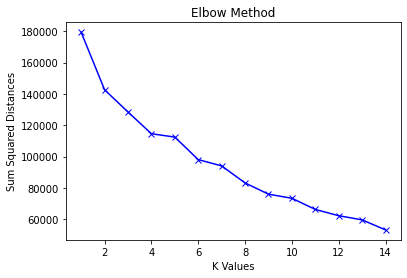

In [27]:
K = range(1,15)
sum_squared_distances = []
for k in K:
  model = KMeans(n_clusters=k).fit(dat[cols])
  sum_squared_distances.append(model.inertia_)
plt.plot(K, sum_squared_distances, "bx-")
plt.xlabel("K Values")
plt.ylabel("Sum Squared Distances")
plt.title("Elbow Method")
plt.show()

In [28]:
kmeans = KMeans(n_clusters=4)
cu_clusters = kmeans.fit(dat[cols])

In [29]:
cu_clusters.cluster_centers_

array([[ 4.37832059e-02,  6.98943890e-02,  1.18439808e-01,
         1.44162239e-02,  1.08526630e-02,  1.52933222e-14,
         6.34799793e-02,  4.65854607e-02,  1.92594272e-02,
         1.90002592e-02,  9.93909550e-02,  2.17506803e-01,
         1.61980044e-05,  7.41058702e-02,  6.38849294e-02,
         5.04081897e-02,  1.43303745e-01,  7.56284826e-02],
       [ 6.28930818e-03,  6.91823899e-03,  1.13207547e-02,
        -4.68375339e-17,  6.28930818e-04,  5.03144654e-03,
         3.77358491e-03,  4.40251572e-03,  1.19695920e-16,
         6.28930818e-04,  1.88679245e-03,  1.06918239e-02,
         4.22327044e+00,  8.17610063e-03,  5.66037736e-03,
         7.54716981e-03,  6.91823899e-03,  6.28930818e-04],
       [ 1.83936235e-03,  1.68608216e-03,  4.94328633e-03,
         2.68240343e-04,  3.44880441e-04,  2.41416309e-03,
         1.91600245e-03,  1.11128142e-03,  9.58001226e-04,
         5.36480687e-04,  2.10760270e-03,  4.29184549e-03,
         1.14787707e+00,  2.72072348e-03,  2.29920294e

In [30]:
preds = cu_clusters.fit_predict(dat[cols])

In [31]:
dat['cluster']=preds

In [32]:
clust_1= dat[dat['cluster']==1]
clust_2= dat[dat['cluster']==2]
clust_3= dat[dat['cluster']==3]
clust_4= dat[dat['cluster']==4]
clust_5= dat[dat['cluster']==5]


In [33]:
catclust_1= clust_1[['_apparel', '_auto','_baby', '_books', '_car', '_computer', '_cool', '_electr',
       '_food', '_game', '_gift', '_health', '_home', '_office', '_other',
       '_outdoor', '_sport', '_telephony']].idxmax(axis=1)

catclust_1.value_counts()

_health       11649
_gift            18
_apparel         18
_baby            14
_food            13
_computer        13
_cool            10
_auto            10
_electr           7
_sport            6
_books            5
_outdoor          5
_game             4
_other            3
_car              3
_telephony        2
_office           2
dtype: int64

In [34]:
catclust_2= clust_2[['_apparel', '_auto','_baby', '_books', '_car', '_computer', '_cool', '_electr',
       '_food', '_game', '_gift', '_health', '_home', '_office', '_other',
       '_outdoor', '_sport', '_telephony']].idxmax(axis=1)

catclust_2.value_counts()

_home         25628
_baby            95
_computer        61
_cool            37
_gift            36
_apparel         34
_auto            30
_electr          25
_food            12
_sport           10
_office           8
_game             8
_outdoor          7
_car              7
_books            6
_other            4
_telephony        3
dtype: int64

In [35]:
catclust_3= clust_3[['_apparel', '_auto','_baby', '_books', '_car', '_computer', '_cool', '_electr',
       '_food', '_game', '_gift', '_health', '_home', '_office', '_other',
       '_outdoor', '_sport', '_telephony']].idxmax(axis=1)

catclust_3.value_counts()

_home      1588
_health       1
_baby         1
dtype: int64

In [36]:
catclust_4= clust_4[['_apparel', '_auto','_baby', '_books', '_car', '_computer', '_cool', '_electr',
       '_food', '_game', '_gift', '_health', '_home', '_office', '_other',
       '_outdoor', '_sport', '_telephony']].idxmax(axis=1)

catclust_4.value_counts()

Series([], dtype: int64)

In [37]:
catclust_1

customer_unique_id
0000b849f77a49e4a4ce2b2a4ca5be3f    _health
000a5ad9c4601d2bbdd9ed765d5213b3    _health
0014a5a58da615f7b01a4f5e194bf5ea    _health
0027324a96d26a2bc7d69262f83c8403    _health
00293787e2aec37a9c253b63fdfe2049    _health
                                     ...   
ffe6305176b9431a3eda3cf8904d7eb7    _health
fff1afc79f6b5db1e235a4a6c30ceda7    _health
fff22793223fe80c97a8fd02ac5c6295    _health
fffcf5a5ff07b0908bd4e2dbc735a684    _health
ffffd2657e2aad2907e67c3e9daecbeb    _health
Length: 11782, dtype: object

In [38]:
cluster1=pd.DataFrame({'customer_unique_id':catclust_1.index, 'category':catclust_1.values})

In [39]:
c1=[cluster1['customer_unique_id']]
c1

[0        0000b849f77a49e4a4ce2b2a4ca5be3f
 1        000a5ad9c4601d2bbdd9ed765d5213b3
 2        0014a5a58da615f7b01a4f5e194bf5ea
 3        0027324a96d26a2bc7d69262f83c8403
 4        00293787e2aec37a9c253b63fdfe2049
                        ...               
 11777    ffe6305176b9431a3eda3cf8904d7eb7
 11778    fff1afc79f6b5db1e235a4a6c30ceda7
 11779    fff22793223fe80c97a8fd02ac5c6295
 11780    fffcf5a5ff07b0908bd4e2dbc735a684
 11781    ffffd2657e2aad2907e67c3e9daecbeb
 Name: customer_unique_id, Length: 11782, dtype: object]

In [40]:
c1_data = pd.DataFrame({'customer_unique_id':c1})